In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def Gini_fairness(d):
    K = len(d)
    den = 2 * K
    num = 0
    for i in range(K):
        for j in range(K):
            num += np.abs(d[i] - d[j])
 
    return num/den

In [5]:
def mix(d):
    K = len(d)
    den = 0
    for i in range(K):
        den += 1 / max(1e-6, d[i])

    ret = 1 - K ** 2 / den

    return ret / K + Gini_fairness(d)

In [87]:
def gini_compare(s, k):
    np.random.seed(0)
    colors = ["red", "orange", "yellow", "green", "blue", "purple", "pink"]
    min_gini = []
    max_gini = []
    min_mix_diff = []
    max_mix_diff = []
    plt.figure()
    plt.plot([0, 1], [0, 0], linestyle='--', color='black')
    values = np.linspace(0, 0.06, 7)
    for u in range(0, 7):
        m = values[u]
        count = 0
        res = []
        while count < s:
            d = np.random.dirichlet(np.ones(k-1)) * (1-m)
            if np.min(d) >= m:
                d = np.append(d, m)
                res.append(d)
                count += 1

        gini = [Gini_fairness(d) * (k)/(k-1) for d in res]
        mi = [mix(d) for d in res]
        mi_gini = [mi[i] - gini[i] for i in range(len(gini))]

        min_gini.append(np.min(gini))
        max_gini.append(np.max(gini))
        min_mix_diff.append(np.min(mi_gini))
        max_mix_diff.append(np.max(mi_gini))
        plt.scatter(gini, mi_gini, color=colors[u], label=f"m = {m:.2f}", alpha=0.7)
    
    plt.xlabel("Gini Index")
    plt.ylabel("Difference between FSI and Gini")
    plt.title("Effect of adding a harmonic mean penalization to Gini")
    plt.xlim(min(min_gini)-0.01, max(max_gini)+0.01)
    plt.ylim(min(min_mix_diff)-0.01, max(max_mix_diff)+0.01)
    plt.legend()
    plt.grid()
    plt.show()


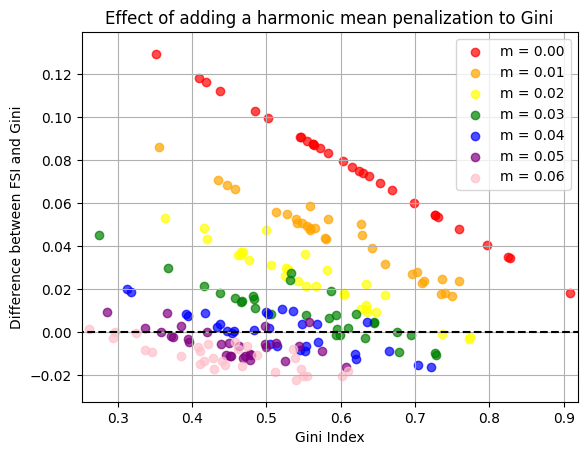

In [88]:
gini_compare(30, 5)